# Exercise 2

### q2.1

In [13]:
import numpy as np
from scipy.integrate import odeint



lam=0.01

E = 0.8 #test energy

def potential(x):
    return 0.5 * x**2 + lam * x**4


L = 8
N = 10000

psi_left_boundary = psi_right_boundary = 1.e-10
dpsi_left_boundary = np.sqrt(2*potential(L))*psi_left_boundary
dpsi_right_boundary = -np.sqrt(2*potential(L))*psi_right_boundary


# Define the ODE function
def schrodinger_system(initial, x, E):
    psi, dpsi = initial
    v = potential(x)
    # Derivatives
    d2psi = 2 * (v - E) * psi
    return np.array([dpsi, d2psi])


# Solve the ODE
x_array_left = np.linspace(-L, 0 , N)
sol_left = odeint(schrodinger_system, [psi_left_boundary, dpsi_left_boundary], x_array_left, args=(E,))
x_array_right = np.linspace(L, 0, N)
sol_right = odeint(schrodinger_system, [psi_right_boundary, dpsi_right_boundary], x_array_right, args=(E,))


# Printing values (QUESTION 2.1)
print(f"Results for test energy E = {E}:")
print(f"Left: psi(0) = {sol_left[-1,0]:.6e}, psi'(0) = {sol_left[-1,1]:.6e}")
print(f"Right:psi(0) = {sol_right[-1,0]:.6e}, psi'(0) = {sol_right[-1,1]:.6e}")



Results for test energy E = 0.8:
Left: psi(0) = 3.042778e+07, psi'(0) = -1.986759e+07
Right:psi(0) = 3.042778e+07, psi'(0) = 1.986759e+07


## q2.2

In [ ]:


def f_even(energies):
    results = []

    for energy in energies:

        sol_left = odeint(schrodinger_system, [psi_left_boundary, dpsi_left_boundary], x_array_left, args=(energy,))
        sol_right = odeint(schrodinger_system, [psi_right_boundary, dpsi_right_boundary], x_array_right, args=(energy,))


        results.append(sol_right[-1,0]/sol_left[-1,0]*sol_left[-1,1]-sol_right[-1,1])

    return results 



def f_odd(energies):
    results = []

    for energy in energies:

        sol_left = odeint(schrodinger_system, [psi_left_boundary, dpsi_left_boundary], x_array_left, args=(energy,))
        sol_right = odeint(schrodinger_system, [psi_right_boundary, dpsi_right_boundary], x_array_right, args=(energy,))


        results.append(sol_right[-1,0] + sol_left[-1,0])

    return results 


## q2.3

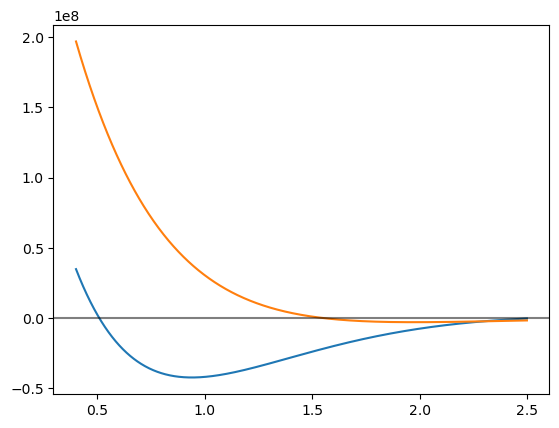

In [18]:
import matplotlib.pyplot as plt

energies = np.linspace(0.4,2.5,1000)

plt.plot(energies,f_even(energies))
plt.plot(energies,f_odd(energies))
plt.axhline(0,color="k",alpha=0.5)